# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
#Importando base de dados

casa = pd.read_csv('housing.csv')
casa.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
casa['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Existem dados em branco para o número de quartos e o resultados quanto a proximidade da praia não é numérico

In [5]:
casa[casa['total_bedrooms'].isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [6]:
casa['total_bedrooms'] = casa['total_bedrooms'].interpolate()

In [7]:
casa['total_bedrooms'].isnull().sum()

0

In [8]:
var_lat = casa['latitude'].max() - casa['latitude'].min()
var_long = casa['longitude'].max() - casa['longitude'].min()

print("A variação de latitudes é: ",{var_lat},". A de longitudes é: ",{var_long},".")

A variação de latitudes é:  {9.410000000000004} . A de longitudes é:  {10.039999999999992} .


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [9]:
# Separando os dados que serão usados
casa_2 = casa.drop(columns = ['ocean_proximity']).copy()

<Axes: >

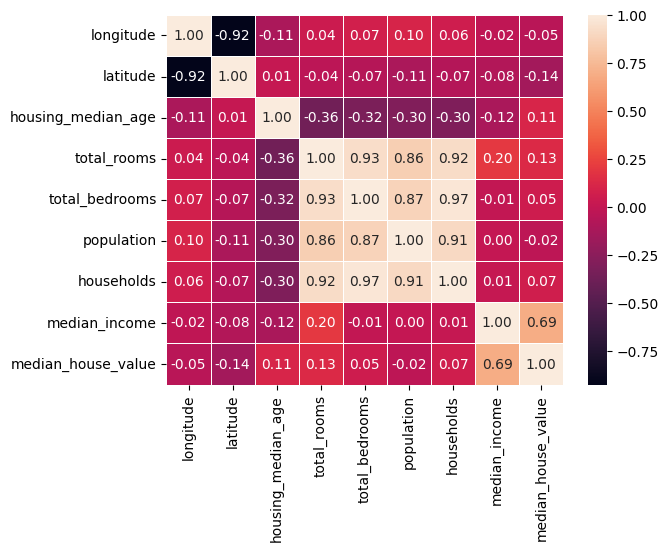

In [10]:
# Encontrando a correlação
matriz = casa_2.corr()

# Criando a matriz 
sns.heatmap(matriz, annot = True, fmt=".2f", linewidths=.6)

Existem algumas variáveis, que parecem, ter altas correlações entre si, como exemplos, total_bedrooms x households, tota_rooms x tota_bedrooms, total_rooms x households,  que possuem valores de correlação muito próximos de 1. Em relação ao preço da casa a variável que parece ter maior influência é o rendimento médio.

### 3. Separe os dados em validação e teste

In [11]:
# Dados de X
X = pd.get_dummies(casa.drop(columns = ['median_house_value']), drop_first = True)

# Dados de y
y = casa.loc[:, 'median_house_value']

# Seprarando os dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [12]:
# Treino da Árvore de Profundidade Máxima 2
tree_2 = DecisionTreeRegressor(max_depth=2)
tree_2.fit(X_train, y_train)

# Treino da Árvore de Profundidade Máxima 8
tree_8 = DecisionTreeRegressor(max_depth=8)
tree_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [13]:
# MSE Para Base de Treino:

    # Árvore de Profundidade Máxima 2
mse2 = tree_2.score(X_train, y_train)
print("O MSE, de treino, da árvore de profundidade máxima 2 é:", ('%.4f' % mse2).replace(".", ","))

    # Árvore de Profundidade Máxima 8
mse8 = tree_8.score(X_train, y_train)
print("O MSE, de treino, da árvore de profundidade máxima 8 é:", ('%.4f' % mse8).replace(".", ","))

O MSE, de treino, da árvore de profundidade máxima 2 é: 0,4949
O MSE, de treino, da árvore de profundidade máxima 8 é: 0,7567


In [14]:
# MSE Para Base de Teste:

    # Árvore de Profundidade Máxima 2
mse2 = tree_2.score(X_test, y_test)
print("O MSE, de teste, da árvore de profundidade máxima 2 é:", ('%.4f' % mse2).replace(".", ","))

    # Árvore de Profundidade Máxima 8
mse8 = tree_8.score(X_test, y_test)
print("O MSE, de teste, da árvore de profundidade máxima 8 é:", ('%.4f' % mse8).replace(".", ","))

O MSE, de teste, da árvore de profundidade máxima 2 é: 0,4893
O MSE, de teste, da árvore de profundidade máxima 8 é: 0,6903


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Como os valores de erro quadrático médio, para teste e treino, da árvore de profundidade máxima igual a 2 são menores essa me parece mais adequada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

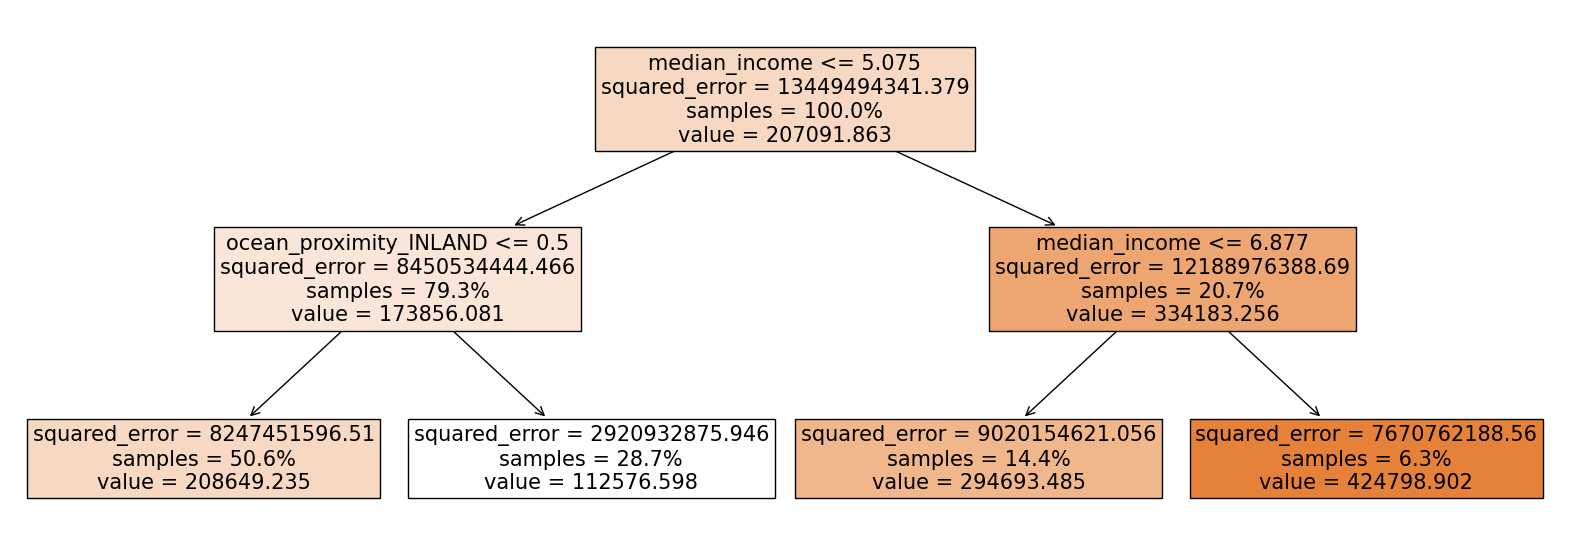

In [21]:
# Vizualização da árvore de profundidade máxima 2

plt.figure(figsize=(20, 7))

arvore = tree.plot_tree(tree_2, max_depth = 40, feature_names = X.columns, filled = True, proportion = True, fontsize = 15) 

Como existe uma maior quantidade de registros "sample" na variável median_income de valor menor que 5,075, seguido de ocean_proximity com resposta "In Land", essas variáveis parecem mais importantes na árvore.